In [75]:
%reload_ext autoreload
%autoreload 2
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import mpl_utility_func 
import mpl_estimation

In [76]:
#mpl_utility_func.mpl_v(0,10,params=np.array([1,.8,10]),dstyle='attention')
#mpl_utility_func.mpl_v(0,10,args={'rra':1,'k':2},dstyle='hb')
mpl_utility_func.mpl_v(10,10,params={'rra':1,'beta':.5,'delta':.8},dstyle='quasihb')
#mpl_utility_func.mpl_v(0,10,args={'rra':1,'k':1,'a':1},dstyle='lp')
#mpl_utility_func.mpl_v(0,10,args={'rra':1,'k':1,'b':1},dstyle='bbs')
#mpl_utility_func.mpl_v(10,10,params={'rra':1,'beta':2},dstyle='gb')

array([0.53687091])

In [77]:
# Chávez, M. E., Villalobos, E., Baroja, J. L., & Bouzas, A. (2017). Hierarchical Bayesian modeling of intertemporal choice. Judgment and Decision Making, 12(1), 19-28.

chavez_dt = pd.read_csv('data/chavez_data.csv')

# questionnaire design
pregunta = np.array([54,0,55,117,55,0,75,61,19,0,25,53,31,0,85,7,
                     14,0,25,19,47,0,50,160,15,0,35,13,25,0,60,14,
                     78,0,80,162,40,0,55,62,11,0,30,7,67,0,75,119,
                     34,0,35,186,27,0,50,21,69,0,85,91,49,0,60,89,
                     80,0,85,157,24,0,35,29,33,0,80,14,28,0,30,179,
                     34,0,50,30,25,0,30,80,41,0,75,20,54,0,60,111,
                     54,0,80,30,22,0,25,136,20,0,55,7]).reshape(27, 4)

condition_col = np.array(['DT'+str(i) for i in range(1, 28)]).reshape(-1,1)
pregunta = np.hstack((condition_col,pregunta))
pregunta = pd.DataFrame(pregunta)
condition_col_name = ['ss_amount','ss_delay','ll_amount','ll_delay']
pregunta.columns = ['condition'] + condition_col_name

# object containing participants' choices: '0' is choice of SS, '1' is choice of 'LL'
chavez_dt = pd.melt(chavez_dt, id_vars=['ID','School'], var_name='condition', value_name='choice')
chavez_dt = pd.merge(chavez_dt,pregunta,on='condition')
chavez_dt[condition_col_name] = chavez_dt[condition_col_name].apply(pd.to_numeric)
chavez_dt.columns = ['person_id','school','condition','choice'] + condition_col_name

chavez_dt

,person_id,school,condition,choice,ss_amount,ss_delay,ll_amount,ll_delay
0,1,1,DT1,0.0,54,0,55,117
1,2,1,DT1,0.0,54,0,55,117
2,3,1,DT1,0.0,54,0,55,117
3,4,1,DT1,1.0,54,0,55,117
4,5,1,DT1,0.0,54,0,55,117
...,...,...,...,...,...,...,...,...
34663,1552,8,DT27,1.0,20,0,55,7
34664,1553,8,DT27,1.0,20,0,55,7
34665,1554,8,DT27,1.0,20,0,55,7
34666,1555,8,DT27,1.0,20,0,55,7


In [78]:
# Model fitting: maximum likelihood approach
data = chavez_dt
init_params = np.array([1,50,1])
dstyle = 'attention'
ustyle = 'crra'
bounds = [(0,1),(0.8,100),(0,100)]
result = minimize(mpl_estimation.log_likelihood, 
         x0=init_params, args=(data,dstyle,ustyle), 
         bounds=bounds,
         tol=1e-8,
         method='L-BFGS-B')
result

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 16993.583764312538
        x: [ 9.926e-01  8.355e-01  3.502e-01]
      nit: 13
      jac: [ 1.143e+00 -9.459e-02  1.313e-01]
     nfev: 100
     njev: 25
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [131]:
attention_result = mpl_estimation.mle(data=chavez_dt,
                                    init_params=np.array([1,100,1]), 
                                    dstyle='attention',
                                    ustyle='crra', 
                                    bounds=[(0,1),(.8,100),(0,100)])

# hyperbolic
hb_result = mpl_estimation.mle(data=chavez_dt,
                            init_params = np.array([1,1]),
                            dstyle='hb',
                            ustyle='crra',
                            bounds = [(0,100),(0,100)])

# quasi-hypberbolic
quasihb_result = mpl_estimation.mle(data=chavez_dt,
                            init_params = np.array([.1,.1,1]),
                            dstyle='quasihb',
                            ustyle='crra',
                            bounds =[(0,1),(0,1),(0,100)])

# Loewenstein-Prelec 
lp_result = mpl_estimation.mle(data=chavez_dt,
                            init_params = np.array([1,1,1]),
                            dstyle='lp',
                            ustyle='crra',
                            bounds =[(0,100),(0,100),(.01,100)])

# Benhabib-Bisin-Schotter 
bbs_result = mpl_estimation.mle(data=chavez_dt,
                            init_params = np.array([1,1,1]),
                            dstyle='bbs',
                            ustyle='crra',
                            bounds =[(0,100),(0,100),(0,100)])

# Gershman-Bhui 
gb_result = mpl_estimation.mle(data=chavez_dt,
                            init_params = np.array([.01,1]),
                            dstyle='gb',
                            ustyle='crra',
                            bounds = [(.01,1),(.01,100)])



In [132]:
pd.DataFrame([attention_result,hb_result,quasihb_result,lp_result,bbs_result,gb_result])

,model,params,se,log-likelihood,aic,bic,gradient
0,attention-crra,"[0.99, 0.84, 0.35]","[0.001, 0.003, 0.002]",-16993.583764,33993.167528,34049.888962,"[0.12, -0.01, 0.02]"
1,hb-crra,"[0.01, 0.37]","[0.0, 0.0]",-17157.307346,34318.614692,34356.428981,"[-0.34, -0.05]"
2,quasihb-crra,"[1.0, 0.99, 0.35]","[0.109, 0.003, 0.044]",-17188.682152,34383.364304,34440.085738,"[-88.04, 0.28, 0.01]"
3,lp-crra,"[100.0, 0.43, 0.3]","[0.077, 0.042, 0.022]",-23285.660453,46577.320905,46634.042340,"[8.46, -2206.26, 2295.89]"
4,bbs-crra,"[0.01, 1.0, 0.34]","[0.0, 0.005, 0.001]",-17278.081342,34562.162683,34618.884117,"[89739.02, 0.0, 1173.25]"
5,gb-crra,"[1.0, 0.01]","[0.005, 0.005]",-22303.743604,44611.487209,44649.301498,"[-371.62, 3307.2]"


In [74]:
# Model fitting: Bayesian approach
def attention_v(t, x, *args,**kwargs):
    
    if delta == 1:
        g = t
    elif (delta < 1) & (delta > 0):
        g = 1 / (1 - delta) * (delta**(-t) - 1)
    else:
        print("Invalid value for argument 'delta'. Must be greater than 0 and not greater than 1.")
        return

    u = x**rra
    w_t = 1 / (1 + g * pm.math.exp(-u / lambd))
    
    return w_t*u


with pm.Model() as model:

    data = chavez_dt    
    ss_t = data['ss_delay'].values
    ss_x = data['ss_amount'].values
    ll_t = data['ll_delay'].values
    ll_x = data['ll_amount'].values
    choice = data['choice'].values

    delta = pm.TruncatedNormal('delta',mu=1,sigma=1,lower=0,upper=1)
    lambd = pm.Uniform('lambd',lower=0,upper=100)
    rra = pm.TruncatedNormal('rra',mu=10,sigma=1,lower=0)
    
    ss_v = attention_v(ss_t, ss_x, delta, lambd, rra)
    ll_v = attention_v(ll_t, ll_x, delta, lambd, rra)
    p_choice_ll = pm.Deterministic('p_choice_ll',pm.invlogit(ll_v-ss_v))

    p = pm.Bernoulli('p',p_choice_ll,observed = choice)
    idata = pm.sample(1000)
    #start = pm.find_MAP()


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3700 seconds.


In [136]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

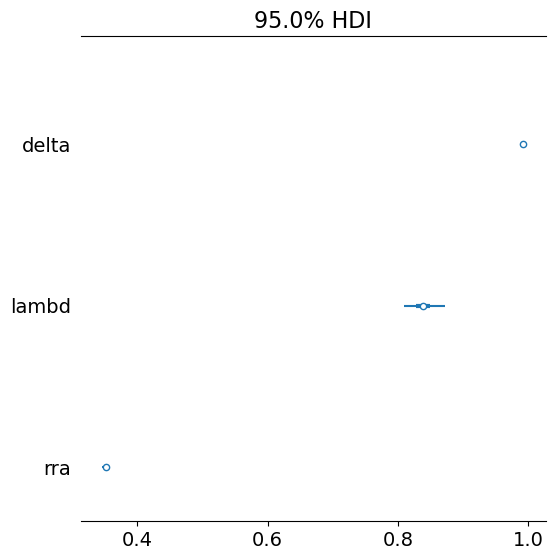

In [143]:
az.plot_forest(idata, var_names=['delta','lambd','rra'], combined=True, hdi_prob=0.95)